# Employee Turnover Prediction

# --------------------------------------------------------------------------------------------------------------

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Reading Employee's Data Set (downloaded from Kaggle)

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
df.shape

(14999, 10)

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

## Droping duplicates

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(11991, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


# Exploratory Data Analysis (EDA)

## Number of projects

In [11]:
df["number_project"].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

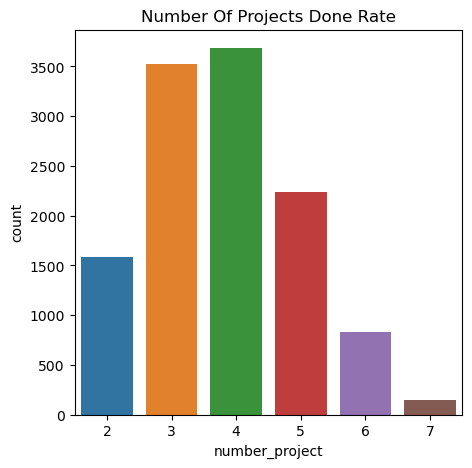

In [12]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x="number_project")
plt.title("Number Of Projects Done Rate")
plt.show()

## Average Monthly Hours

In [13]:
df["average_montly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

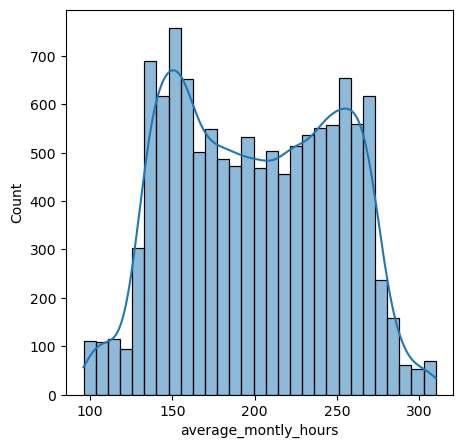

In [14]:
plt.figure(figsize=(5, 5))
sns.histplot(data = df, x = df["average_montly_hours"], kde=True)
plt.show()

## Time Spend in company

In [15]:
df["time_spend_company"].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

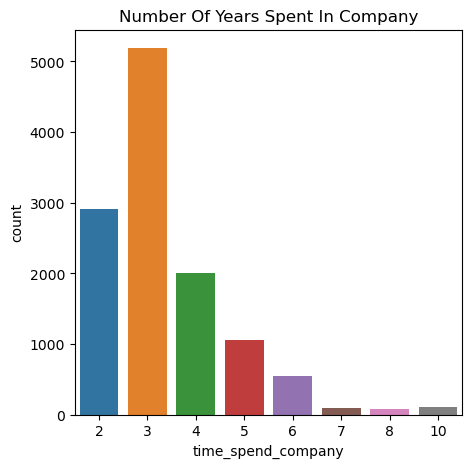

In [16]:
plt.figure(figsize=(5, 5))
sns.countplot(x = "time_spend_company", data=df)
plt.title("Number Of Years Spent In Company")
plt.show()

## Work accidents

In [17]:
df["Work_accident"].value_counts()

0    10141
1     1850
Name: Work_accident, dtype: int64

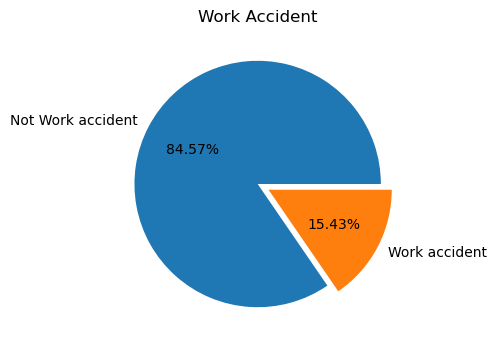

In [18]:
plt.figure(figsize=(4, 4))
plt.pie(x = df["Work_accident"].value_counts(), labels=["Not Work accident","Work accident"], autopct="%1.2f%%", explode=[0, 0.1])
plt.title("Work Accident")
plt.show()

## Promotion Made In The Last 5 Years

In [19]:
df["promotion_last_5years"].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

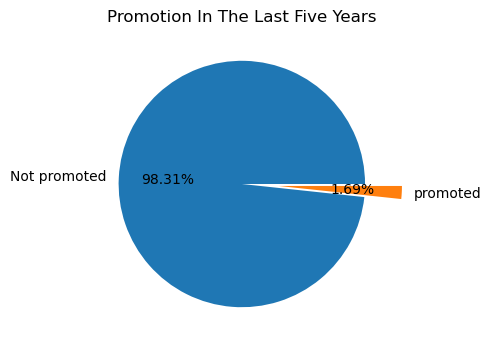

In [20]:
plt.figure(figsize=(4, 4))
plt.pie(x = df["promotion_last_5years"].value_counts(), labels=["Not promoted","promoted"], autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years")
plt.show()

## Sales (Department)

In [21]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [22]:
df["sales"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64

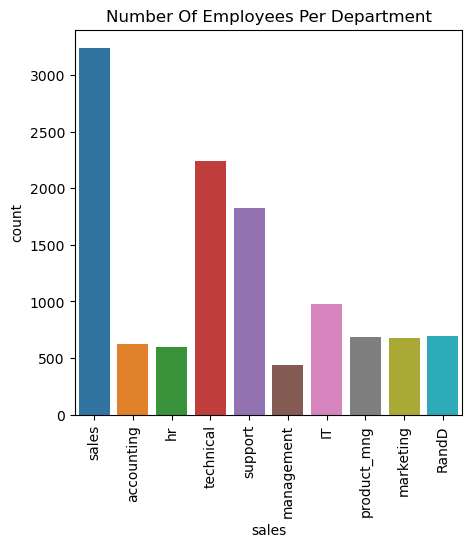

In [23]:
plt.figure(figsize=(5, 5))
sns.countplot(x = "sales", data=df)
plt.title("Number Of Employees Per Department")
plt.xticks(rotation=90)
plt.show()

## Salary

In [24]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [25]:
df["salary"].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

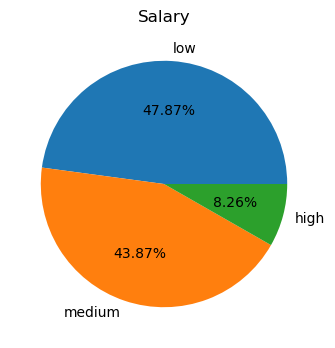

In [26]:
plt.figure(figsize=(4, 4))
plt.pie(x = df["salary"].value_counts(), labels=['low', 'medium', 'high'], autopct="%1.2f%%")
plt.title("Salary")
plt.show()

# Data Preprocessing

In [27]:
df.rename(columns={"sales": "department", "salary": "salary_level"}, inplace=True)

In [28]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

# Categorical Encoding

In [29]:
categorical_cols = ["department", "salary_level"]
encoded_cols = pd.get_dummies(df[categorical_cols], prefix="categorical")

In [30]:
encoded_cols

,categorical_IT,categorical_RandD,categorical_accounting,categorical_hr,categorical_management,categorical_marketing,categorical_product_mng,categorical_sales,categorical_support,categorical_technical,categorical_high,categorical_low,categorical_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0,0,0,1,0,0
11996,0,0,0,0,1,0,0,0,0,0,1,0,0
11997,0,0,0,0,1,0,0,0,0,0,1,0,0
11998,0,0,0,0,0,1,0,0,0,0,1,0,0


In [31]:
df = df.join(encoded_cols)

In [32]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_level,...,categorical_hr,categorical_management,categorical_marketing,categorical_product_mng,categorical_sales,categorical_support,categorical_technical,categorical_high,categorical_low,categorical_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [33]:
df.drop(["department", "salary_level"], inplace=True, axis="columns")

In [34]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'categorical_IT', 'categorical_RandD',
       'categorical_accounting', 'categorical_hr', 'categorical_management',
       'categorical_marketing', 'categorical_product_mng', 'categorical_sales',
       'categorical_support', 'categorical_technical', 'categorical_high',
       'categorical_low', 'categorical_medium'],
      dtype='object')

# Split Data Into Train and Test

In [35]:
X = df.drop("left", axis=1)
y = df["left"]

In [36]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,categorical_IT,categorical_RandD,categorical_accounting,categorical_hr,categorical_management,categorical_marketing,categorical_product_mng,categorical_sales,categorical_support,categorical_technical,categorical_high,categorical_low,categorical_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [37]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [40]:
X_train.shape

(9592, 20)

In [41]:
X_test.shape

(2399, 20)

# Training Model

## Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
logReg = LogisticRegression(max_iter=3000)

In [44]:
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [45]:
logReg_predictions = logReg.predict(X_test)

In [46]:
accuracy_score(y_test, logReg_predictions)

0.8257607336390163

In [47]:
print(classification_report(y_test, logReg_predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1996
           1       0.45      0.17      0.25       403

    accuracy                           0.83      2399
   macro avg       0.65      0.56      0.57      2399
weighted avg       0.78      0.83      0.79      2399



## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
ranF = RandomForestClassifier(n_estimators=100)

In [50]:
ranF.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
ranF_predictions = ranF.predict(X_test)

In [52]:
accuracy_score(y_test, ranF_predictions)

0.9829095456440183

In [53]:
print(classification_report(y_test, ranF_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1996
           1       0.98      0.92      0.95       403

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



# Saving Model

In [54]:
import pickle

In [56]:
with open("modelEmp.pkl", "wb") as model_file:
  pickle.dump(ranF, model_file)